In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [3]:
df['bought_insurance'].value_counts()

1    14
0    13
Name: bought_insurance, dtype: int64

In [4]:
df.isnull().sum()

age                 0
bought_insurance    0
dtype: int64

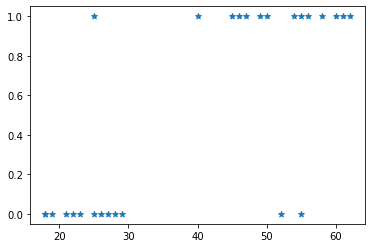

In [5]:
py.scatter(df['age'], df['bought_insurance'], marker = '*')

In [6]:
x = df[['age']]
y = df['bought_insurance']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 101)

In [8]:
lr_model = LogisticRegression()

In [9]:
lr_model.fit(X_train ,y_train)

LogisticRegression()

In [16]:
pred_res = lr_model.predict(X_test)
pred_res

array([1, 0, 1, 0, 0, 0], dtype=int64)

In [17]:
y_test

25    1
22    1
24    1
20    0
10    0
19    0
Name: bought_insurance, dtype: int64

<AxesSubplot:xlabel='age', ylabel='bought_insurance'>

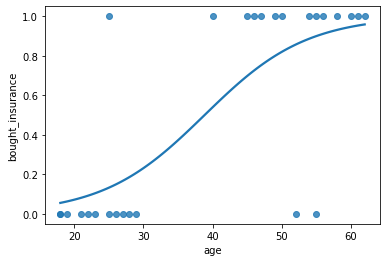

In [18]:
sns.regplot(x = df['age'], y = df['bought_insurance'], data = df, logistic = True, ci = None)

<AxesSubplot:>

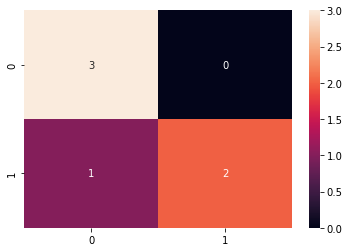

In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred_res)

sns.heatmap(cm, annot= True)

In [ ]:
# Handwritten digit recognition- Multiclass classification

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [24]:
from sklearn.datasets import load_digits

digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [25]:
digits['data'][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

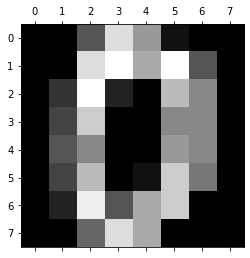

In [26]:
py.gray()

py.matshow(digits['images'][0])

In [27]:
digits['target'][0]

0

In [28]:
X_train, X_test, y_train, y_test = train_test_split(digits['data'], digits['target'], test_size= 0.2, random_state= 101)

In [29]:
X_train.shape

(1437, 64)

In [30]:
num_model = LogisticRegression()

num_model.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
pred_res_num = num_model.predict(X_test)

In [33]:
num_model.score(X_test, y_test)

0.9722222222222222

In [36]:
num_model.predict([digits['data'][40]])

array([8])

In [37]:
digits['target'][40]

8

In [38]:
cm = confusion_matrix(y_test, pred_res_num)

<AxesSubplot:>

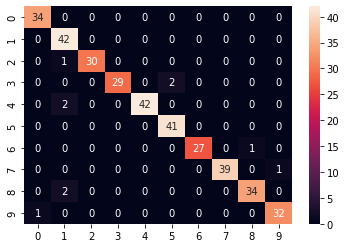

In [39]:
sns.heatmap(cm, annot = True)